解析手順の確認
Pandas - データフレーム
Numpy - 行列計算
Scipy - より高度な科学計算したい
https://docs.scipy.org/doc/scipy/reference/
matplotlib - 図表やグラフを作りたい
Seaborn - matplotlibのラッパーでデータ可視 使うならこっちが良い
*numpy,matplotlib,pandasに依存してるから同時にimport*

参考サイト：
【データ分析】米国自動車株の解析をしてみる
https://qiita.com/m-hayashi/items/bbd90806328af66906e8
pythonでデータを可視化したいならseabornを使おう！
https://qiita.com/HiromuMasuda0228/items/babdfa175815fb3e3a94

In [1]:
#
import numpy as np
import pandas as pd
from pandas import DataFrame, Series

#
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
#
from datetime import datetime

#pandas中にあったdatareaderは外部に独立したためこちらに変更 
import pandas_datareader.data as pdr

In [7]:
#
end = datetime.now()
#
start = datetime(end.year-1, end.month, end.day)

#Yahoo
df = pdr.DataReader('GM', 'yahoo', start, end)

In [8]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-08-23,36.169998,35.630001,35.950001,35.669998,8742400.0,34.209019
2018-08-24,36.099998,35.759998,35.950001,35.950001,7278000.0,34.477551
2018-08-27,37.779999,36.230000,36.290001,37.689999,17968000.0,36.146286
2018-08-28,37.860001,36.919998,37.849998,37.320000,9638800.0,35.791435
2018-08-29,37.419998,36.880001,37.389999,37.119999,7223400.0,35.599628


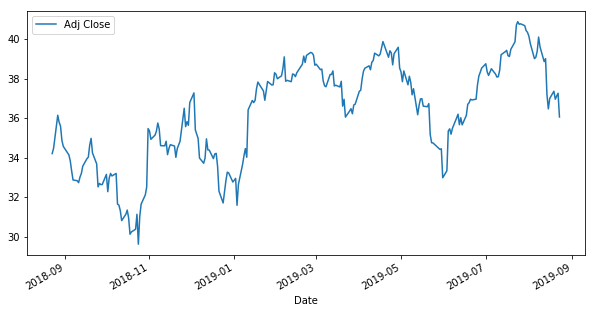

In [9]:
df['Adj Close'].plot(legend=True, figsize=(10,5))

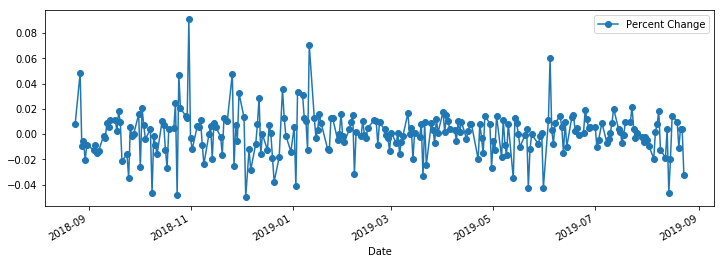

In [11]:
#日ごとの終値の変動パーセンテージを「PercentChange」カラムとして追加する
df['Percent Change'] = df['Adj Close'].pct_change()

#変動推移をプロット
df['Percent Change'].plot(legend=True, figsize=(12,4), marker='o')

In [13]:
import seaborn as sns

In [14]:
df2 = pdr.DataReader(['GM','F','HMC','TM','TSLA'], 'yahoo', start, end)['Adj Close']

In [15]:
df2.head()

Symbols,F,GM,HMC,TM,TSLA
Date,,,,,
2018-08-23,8.859780,34.209019,29.157013,120.541992,320.100006
2018-08-24,8.905781,34.477551,28.884520,121.113838,322.820007
2018-08-27,9.190986,36.146286,29.614418,124.692833,319.269989
2018-08-28,9.209387,35.791435,29.663078,124.298454,311.859985
2018-08-29,9.172585,35.599628,29.721470,125.688644,305.010010


In [16]:
pct_changes = df2.pct_change().dropna()

In [17]:
pct_changes.head()

Symbols,F,GM,HMC,TM,TSLA
Date,,,,,
2018-08-24,0.005192,0.007850,-0.009346,0.004744,0.008497
2018-08-27,0.032025,0.048401,0.025270,0.029551,-0.010997
2018-08-28,0.002002,-0.009817,0.001643,-0.003163,-0.023209
2018-08-29,-0.003996,-0.005359,0.001968,0.011184,-0.021965
2018-08-30,-0.027081,-0.020474,-0.016699,-0.017414,-0.006098


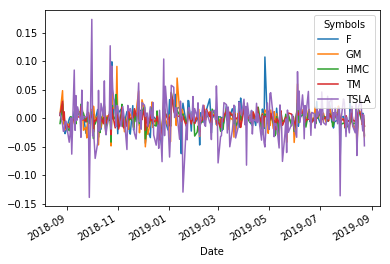

In [19]:
pct_changes.plot(legend=True)

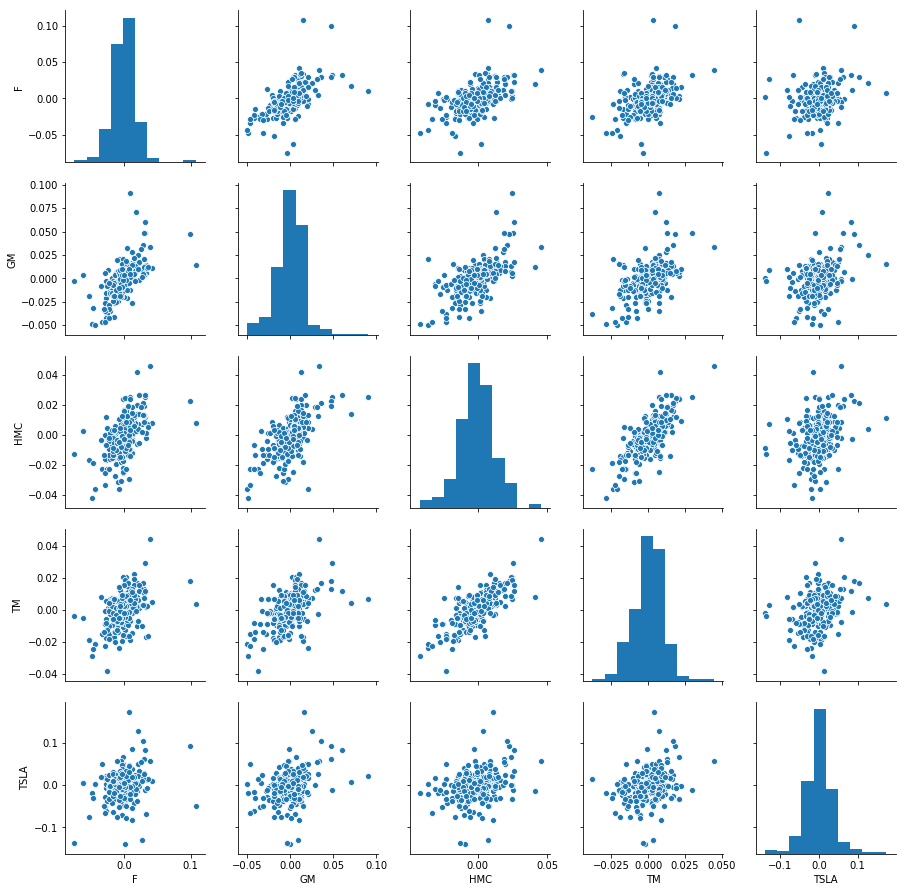

In [32]:
sns.pairplot(data=pct_changes)

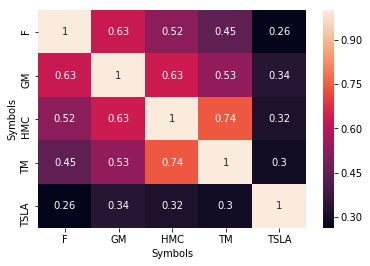

In [22]:
#相関係数を計算してヒートマップ表示
sns.heatmap(pct_changes.corr(), annot=True)